In [2]:
from scipy.optimize import fsolve
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
def func(M, p_rapport):
    g1 = 1.4
    g4 = g1
    T1 = 293
    T4 = T1
    c1 = (g1*0.287*T1)**0.5
    c4 = (g4*0.287*T4)**0.5
    return [-p_rapport + (1 + (2 * g1)/(g4 + 1) * (M[0]**2 - 1)) * (1 - (g1-1)/(g4 + 1) * (c4/c1) * (M[0]**2-1)/M[0])**((-2 * g1)/(g1 -1))]


In [4]:
1e5/3.9066e3

25.597706445502485

In [8]:
M = []
for i in np.arange(10,110,1):
    M.append(list(fsolve(func, [2], args = i)))

In [9]:
fsolve(func, [2], args = 1e5/3.9066e3)

array([1.90827178])

Text(0.5, 1.0, 'Rapport Mach x Pression')

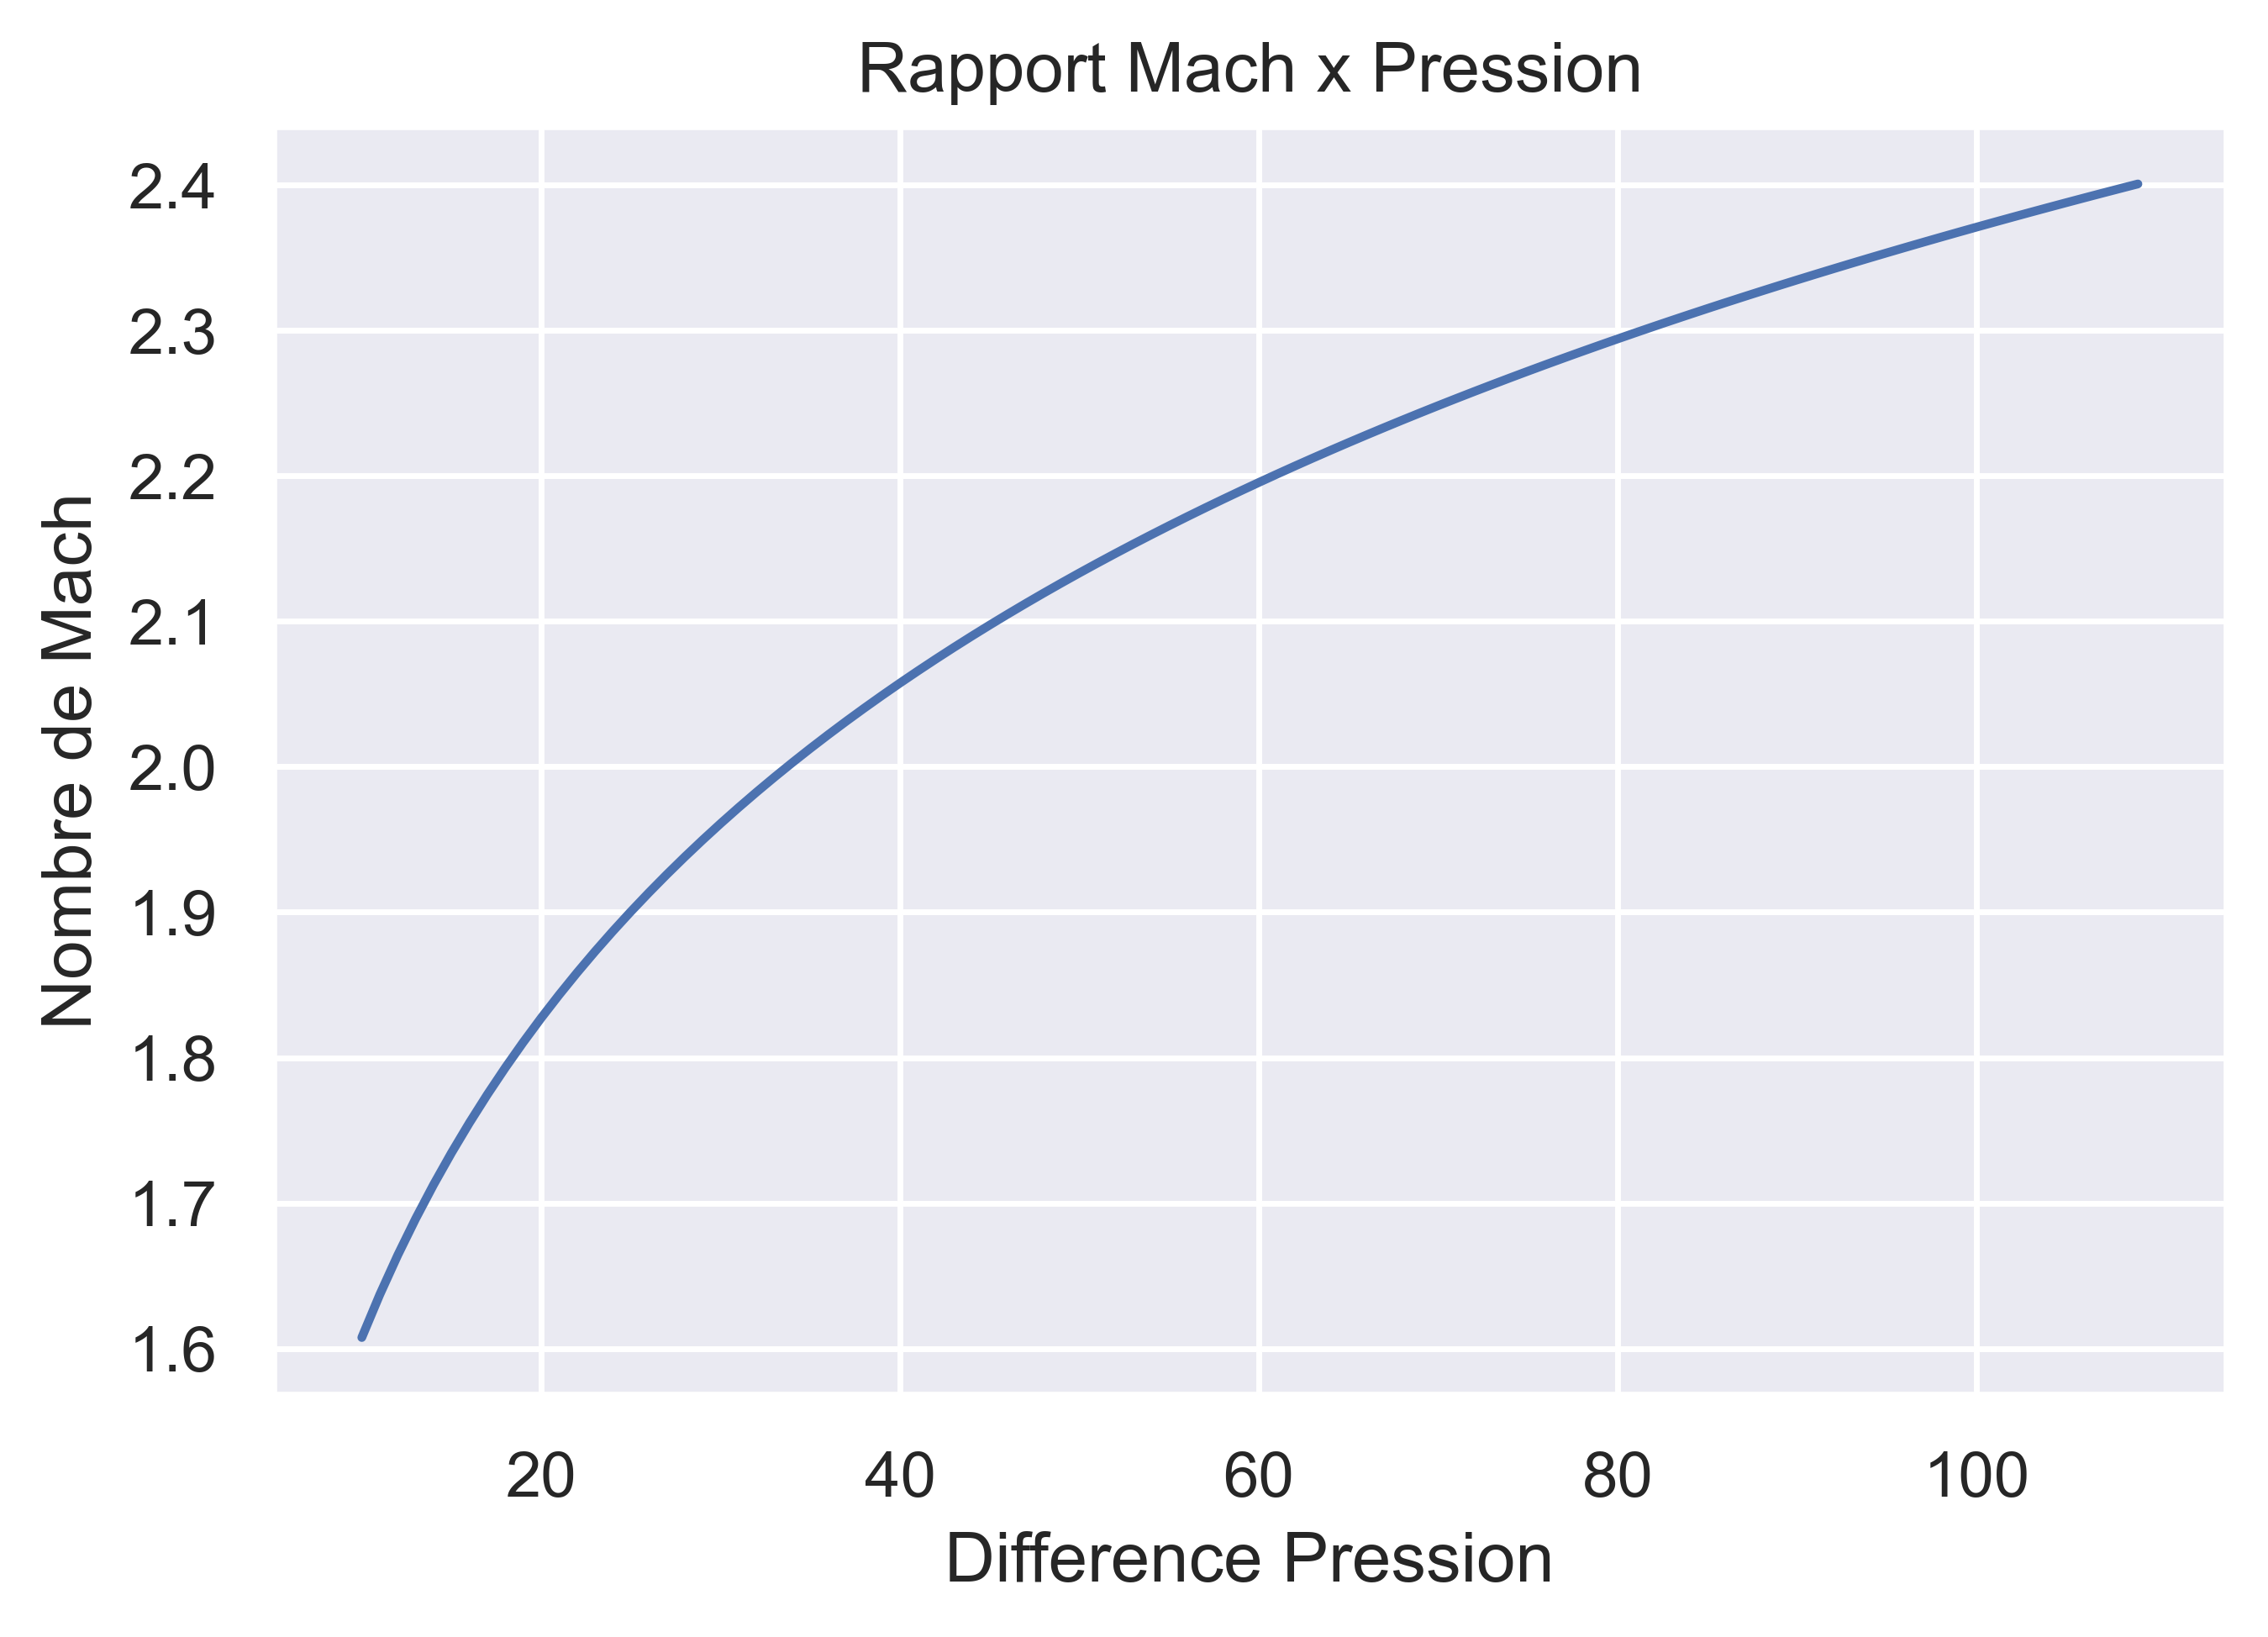

In [10]:
sns.set()
fig, ax=plt.subplots(dpi=500)
plt.plot(np.arange(10,110,1), M)
plt.xlabel('Difference Pression')
plt.ylabel('Nombre de Mach') 
plt.title('Rapport Mach x Pression')

In [11]:
pression=np.array(list(reversed([979, 848, 762, 645, 564, 421, 281, 0])))
volts = np.array(list(reversed([102.8, 90, 80.8, 70, 60, 45, 30, 0]))).reshape((-1, 1))

In [12]:
model = LinearRegression().fit(volts, pression)

In [13]:
model.score(volts, pression)

0.9995789497516266

In [14]:
model.intercept_

-4.231786272402701

In [15]:
volts1 = np.array([102.8, 90, 80.8, 70, 60, 45, 30, 0])
pression1 = np.array([979, 848, 762, 645, 564, 421, 281, 0])

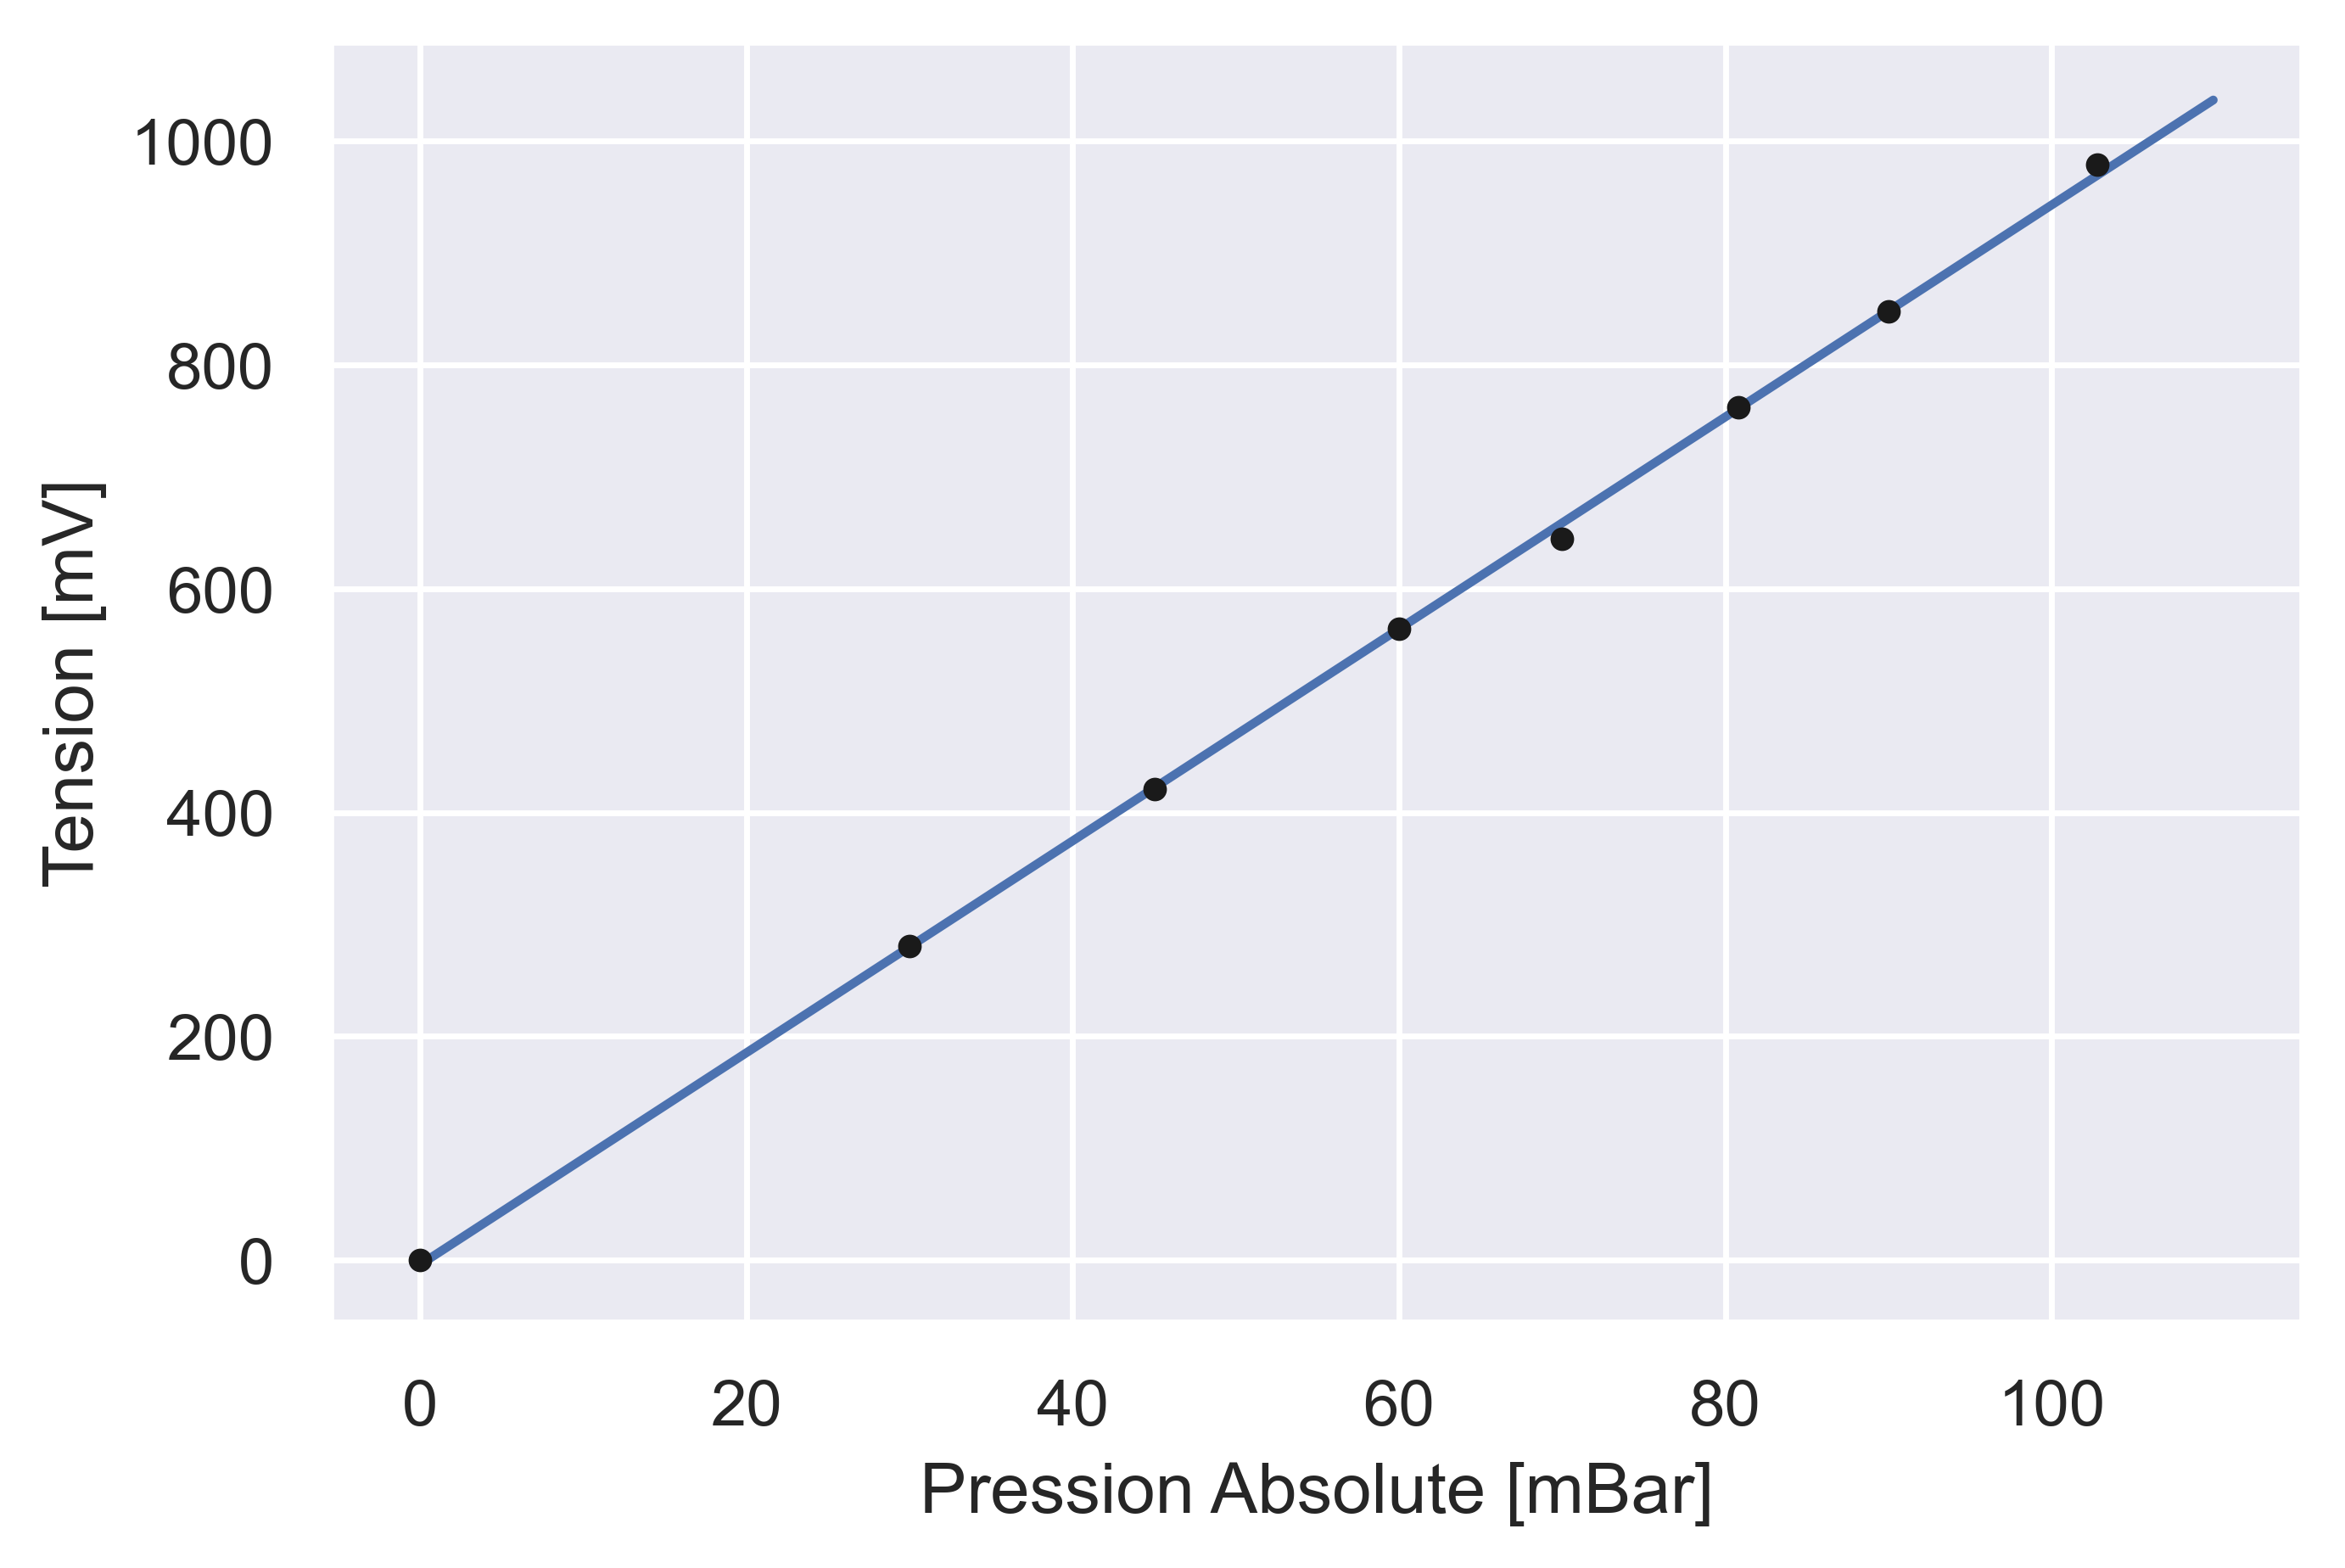

In [16]:
xx = np.arange(0, 110, 0.1)
fig, ax=plt.subplots(dpi=500)
y = model.coef_*xx + model.intercept_
sns.set()
plt.plot(xx, y)
plt.xlabel('Pression Absolute [mBar]')
plt.ylabel('Tension [mV]')
plt.plot(volts1, pression1, 'k.')

In [17]:
df = pd.read_csv('datasbis.csv', delimiter = ';', decimal=',') 
df = df.drop(df.index[9])
volts_exp = np.array(df['Tension (mV)'])
t1_exp = np.array(df['T1 en µs'])
t2_exp = np.array(df['T2 en µs'])
volts_exp

array([ 2.8,  3.9,  4.9,  5.3,  6.1,  7. ,  8. ,  9.1, 10. ,  7. ,  1. ,
        3. ,  4. ,  5. ,  6. ])

In [18]:
pressure_exp = 1004/(model.coef_* volts_exp + model.intercept_)

array([ 45.03643487,  30.69065871,  23.7989716 ,  21.83749905,
        18.74726145,  16.1725938 ,  14.03146049,  12.24779065,
        11.09394571,  16.1725938 , 191.55284216,  41.50871239,
        29.82693278,  23.27629483,  19.08485002])

In [20]:
M_analytique = []
for i in range(len(pressure_exp)):
    M_analytique.append(fsolve(func, [2], args = pressure_exp[i]))

In [21]:
M_exp = (100e-3/((t2_exp - t1_exp)*1e-6))/340

In [22]:
pressure_exp

array([ 45.03643487,  30.69065871,  23.7989716 ,  21.83749905,
        18.74726145,  16.1725938 ,  14.03146049,  12.24779065,
        11.09394571,  16.1725938 , 191.55284216,  41.50871239,
        29.82693278,  23.27629483,  19.08485002])

In [23]:
np.log(pressure_exp)

array([3.80747183, 3.42395833, 3.16964237, 3.08362863, 2.93104769,
       2.78331807, 2.64130199, 2.50534557, 2.40639953, 2.78331807,
       5.25516371, 3.72590334, 3.39541177, 3.14743545, 2.94889483])

Text(0, 0.5, 'Mach')

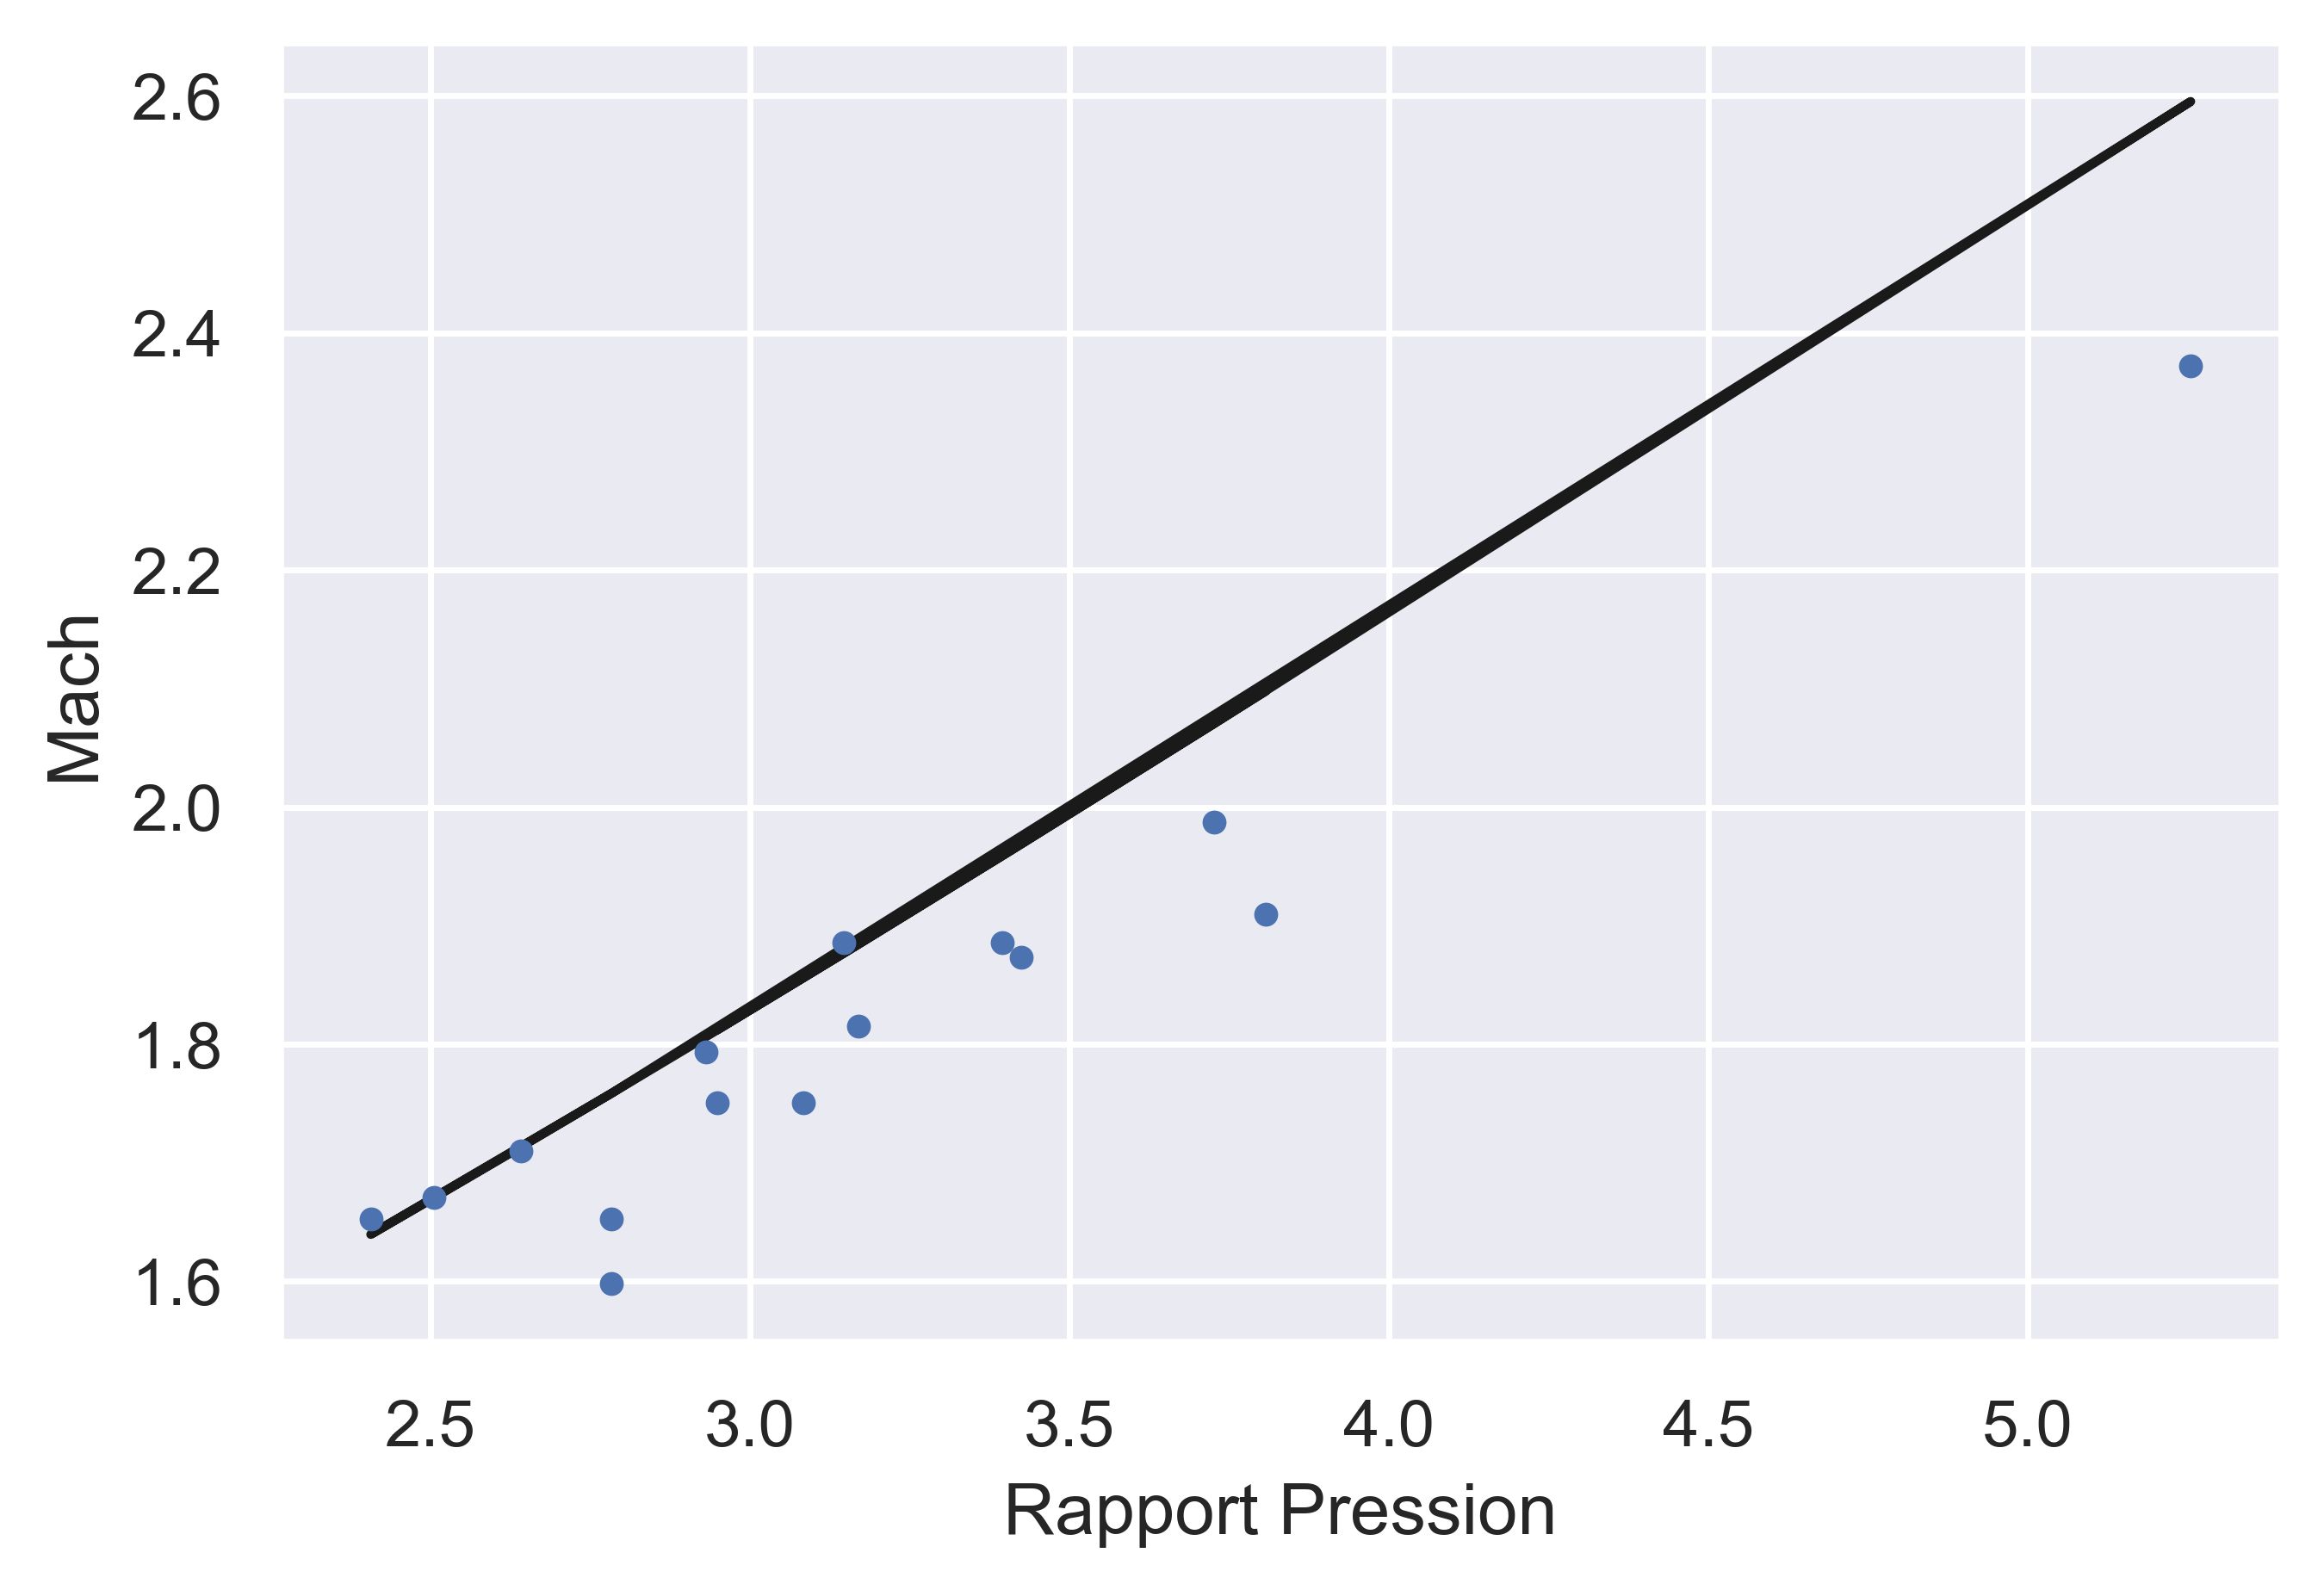

In [24]:
fig, ax=plt.subplots(dpi=500)
y = model.coef_*xx + model.intercept_
plt.plot(np.log(pressure_exp), M_analytique, 'k-')
#plt.plot(volts_n, M_analytique_n, 'y.')
plt.plot(np.log(pressure_exp), M_exp, 'b.', label = 'experimental')
#plt.plot(volts_n, M_exp_n, 'g.', label = 'experimental')
plt.xlabel('Rapport Pression')
plt.ylabel('Mach')

In [25]:
t2r = np.array([536,458,488,446,430,862,379,332,548,772,1072,1088,1044,952,940,1066])
t1r = np.array([890,780,798,756,810,1198,789,764,872,1190,1492,1530,1258,1292,1332,1522])

In [26]:
u_r = 100e-3/((t1r - t2r)*1e-6)

In [224]:
u_r

array([282.48587571, 310.55900621, 322.58064516, 322.58064516,
       263.15789474, 297.61904762, 243.90243902, 231.48148148,
       308.64197531, 239.23444976, 238.0952381 , 226.24434389,
       467.28971963, 294.11764706, 255.10204082, 219.29824561])